# Misophonia Data Analysis Outline

## 1. Linear Regression
- Model building
- Assumptions check
- Model evaluation
    - R-squared
    - Mean Squared Error (MSE)
- Interpretation of results

## 2. Machine Learning
- Data splitting (train/test)
- Model selection
    - Decision Trees
    - Random Forest
    - Support Vector Machines
    - Neural Networks
- Model training and evaluation
    - Accuracy
    - Precision, Recall, F1-Score
    - ROC-AUC
- Hyperparameter tuning
- Model comparison



First, the angle of the jaw and anxiety

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,33.65,1.0,M,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,19.77,0.0,M,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,29.57,0.0,M,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,1.40,0.0,M,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,5.98,0.0,H,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


Correlation: -0.36266540270933073


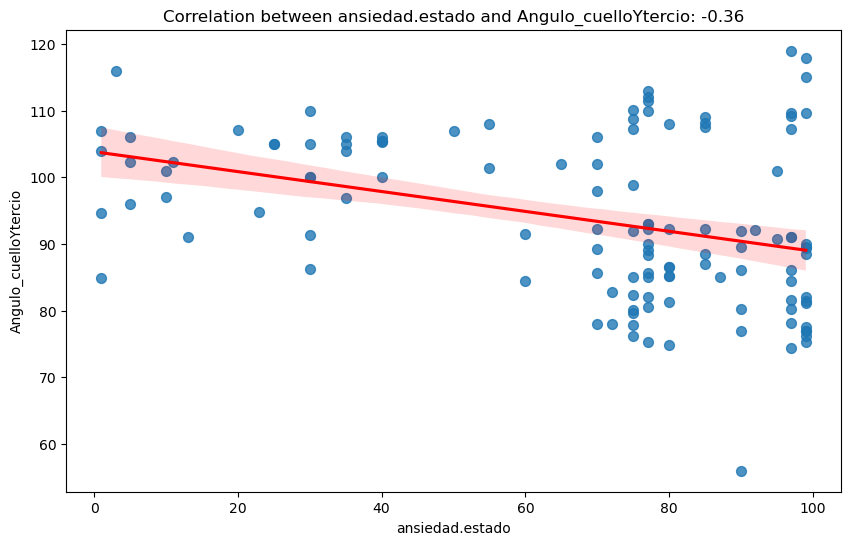

In [4]:
# Calculate the correlation
correlation = df['ansiedad.estado'].corr(df['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Plot the data
plt.figure(figsize=(10, 6))
sns.regplot(x='ansiedad.estado', y='Angulo_cuelloYtercio', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'Correlation between ansiedad.estado and Angulo_cuelloYtercio: {correlation:.2f}')
plt.xlabel('ansiedad.estado')
plt.ylabel('Angulo_cuelloYtercio')
plt.show()

ANOVA F-statistic: 0.6801448948991973
ANOVA p-value: 0.5658744225892609


C:\Users\andre\AppData\Local\Temp\ipykernel_7584\2691008009.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Estado', y='ansiedad.rasgo', data=df, palette='Set2', linewidth=2.5)


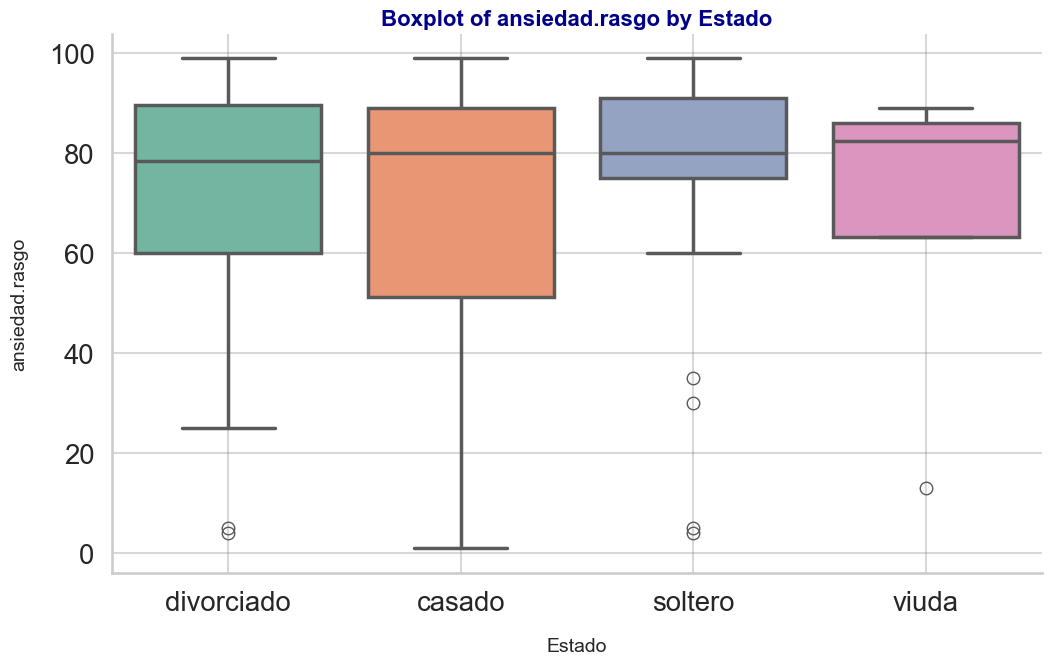

In [5]:
from scipy.stats import f_oneway

# Perform ANOVA test
estado_groups = [group['ansiedad.rasgo'].values for name, group in df.groupby('Estado')]
anova_result = f_oneway(*estado_groups)

# Output the statistics
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

# Set Seaborn theme and context for consistency with previous style
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Boxplot with enhanced color palette
sns.boxplot(x='Estado', y='ansiedad.rasgo', data=df, palette='Set2', linewidth=2.5)

# Title and labels with enhanced font properties
plt.title('Boxplot of ansiedad.rasgo by Estado', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado', fontsize=14, labelpad=15)
plt.ylabel('ansiedad.rasgo', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

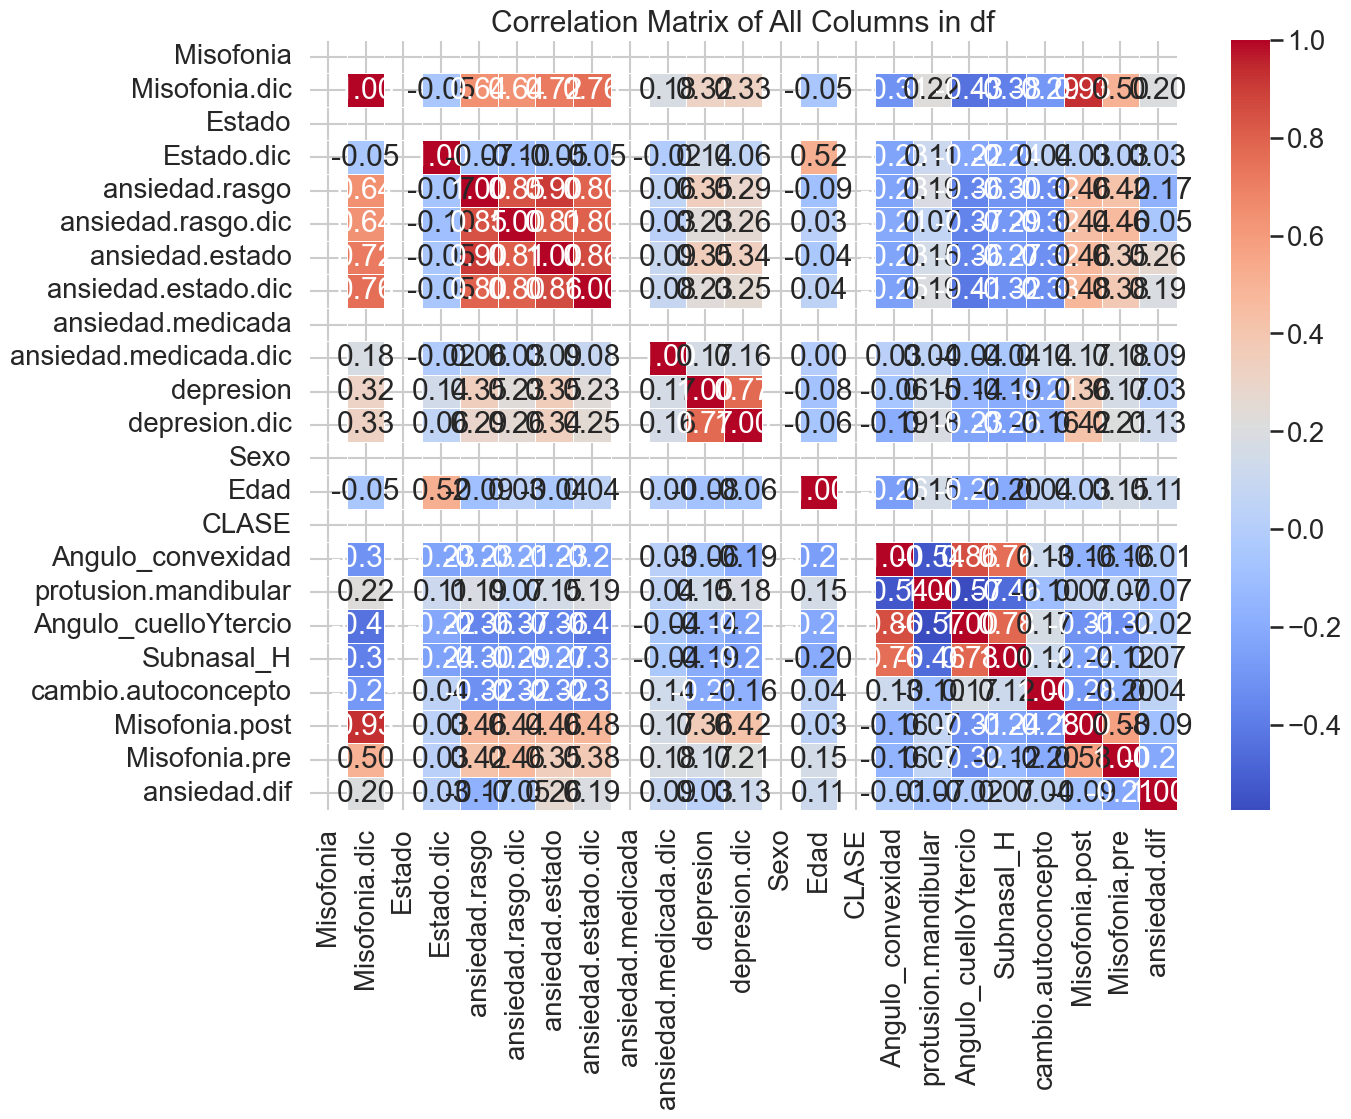

In [6]:
# Convert non-numeric columns to numeric where possible, or drop them
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

# Display the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Columns in df')
plt.show()

Correlation: 0.5197967083412559
P-value: 7.22751858361903e-10


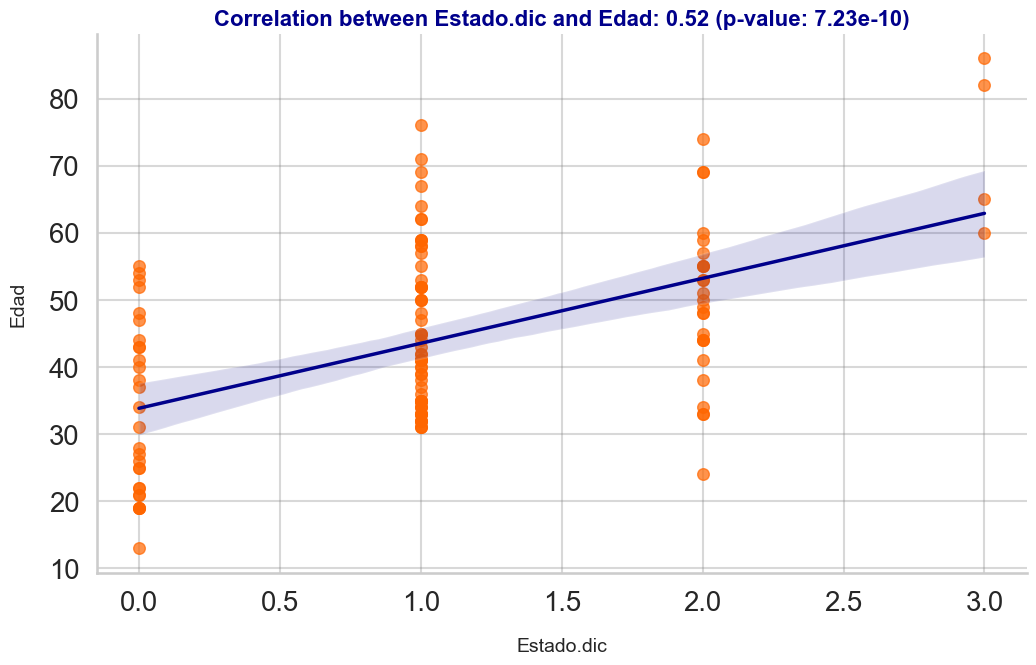

In [7]:
# Calculate the correlation
# Calculate the correlation
correlation = df['Estado.dic'].corr(df['Edad'])
print(f"Correlation: {correlation}")

# Compute the p-value
n = df[['Estado.dic', 'Edad']].dropna().shape[0]
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
print(f"P-value: {p_value}")

sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Scatterplot with regression line
sns.regplot(x='Estado.dic', y='Edad', data=df, 
            scatter_kws={'s': 70, 'alpha': 0.7, 'color': '#ff6600'}, # New scatter color (orange)
            line_kws={'color': 'darkblue', 'lw': 2.5})               # New regression line color (blue)

# Title and labels with enhanced font properties
plt.title(f'Correlation between Estado.dic and Edad: {correlation:.2f} (p-value: {p_value:.2e})',
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado.dic', fontsize=14, labelpad=15)
plt.ylabel('Edad', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

Correlation: 0.8562753660189637
P-value: 0.0


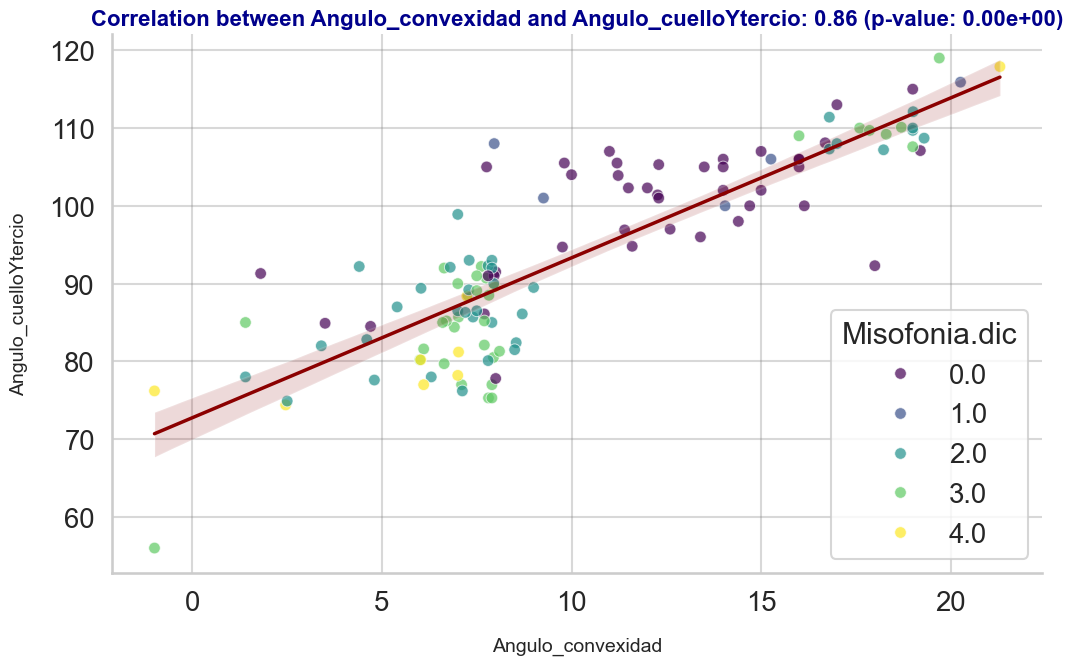

In [8]:
# Calculate the correlation
correlation = df['Angulo_convexidad'].corr(df['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Compute the p-value
n = df[['Angulo_convexidad', 'Angulo_cuelloYtercio']].dropna().shape[0]
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
print(f"P-value: {p_value}")

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Scatterplot with regression line and hue
sns.scatterplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', hue='Misofonia.dic', data=df, 
                palette='viridis', s=70, alpha=0.7)
sns.regplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', data=df, 
            scatter=False, line_kws={'color': 'darkred', 'lw': 2.5})  # Adjust regression line style

# Title and labels with enhanced font properties
plt.title(f'Correlation between Angulo_convexidad and Angulo_cuelloYtercio: {correlation:.2f} (p-value: {p_value:.2e})',
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Angulo_convexidad', fontsize=14, labelpad=15)
plt.ylabel('Angulo_cuelloYtercio', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


Clustering Analysis

In [9]:
df

,Misofonia,Misofonia.dic,Estado,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada,ansiedad.medicada.dic,depresion,depresion.dic,Sexo,Edad,CLASE,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,ansiedad.dif
0,si,4.0,divorciado,2.0,99.0,1.0,99.0,1.0,no,0.0,33.65,1.0,M,44.0,III,7.97,13.0,89.6,1.5,1.0,21.0,14.0,0.0
1,si,2.0,casado,1.0,75.0,1.0,75.0,1.0,no,0.0,19.77,0.0,M,43.0,II,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,0.0
2,no,0.0,divorciado,2.0,77.0,1.0,55.0,0.0,no,0.0,29.57,0.0,M,24.0,I,12.27,11.5,101.4,5.0,NaN,NaN,NaN,-22.0
3,si,3.0,casado,1.0,95.0,1.0,99.0,1.0,no,0.0,1.40,0.0,M,33.0,III,7.81,16.8,75.3,2.7,1.0,NaN,NaN,4.0
4,no,0.0,casado,1.0,30.0,0.0,40.0,0.0,no,0.0,5.98,0.0,H,41.0,I,9.81,33.0,105.5,6.0,NaN,NaN,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,15.0,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,12.0,NaN
135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN
136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN


In [20]:
df_tidy = df.drop(columns=['Misofonia', 'Estado', 'ansiedad.medicada',"ansiedad.dif"])
# encode the categoial variables Sexo and CLASE to numeric
df_tidy = pd.get_dummies(df_tidy, columns=['Sexo', 'CLASE'], drop_first=True)
# get rid of rows with NaN in the columns Misofonia.dic
df_tidy = df_tidy.dropna(subset=['Misofonia.dic'])
# fill NaN values with the median of the column
df_tidy = df_tidy.fillna(df_tidy.median())





In [21]:
df_tidy


,Misofonia.dic,Estado.dic,ansiedad.rasgo,ansiedad.rasgo.dic,ansiedad.estado,ansiedad.estado.dic,ansiedad.medicada.dic,depresion,depresion.dic,Edad,Angulo_convexidad,protusion.mandibular,Angulo_cuelloYtercio,Subnasal_H,cambio.autoconcepto,Misofonia.post,Misofonia.pre,Sexo_M,CLASE_II,CLASE_III
0,4.0,2.0,99.0,1.0,99.0,1.0,0.0,33.65,1.0,44.0,7.97,13.0,89.6,1.5,1.0,21.0,14.0,True,False,True
1,2.0,1.0,75.0,1.0,75.0,1.0,0.0,19.77,0.0,43.0,18.23,-5.0,107.2,7.3,0.0,14.0,13.0,True,True,False
2,0.0,2.0,77.0,1.0,55.0,0.0,0.0,29.57,0.0,24.0,12.27,11.5,101.4,5.0,1.0,14.0,13.0,True,False,False
3,3.0,1.0,95.0,1.0,99.0,1.0,0.0,1.40,0.0,33.0,7.81,16.8,75.3,2.7,1.0,14.0,13.0,True,False,True
4,0.0,1.0,30.0,0.0,40.0,0.0,0.0,5.98,0.0,41.0,9.81,33.0,105.5,6.0,1.0,14.0,13.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,3.0,1.0,89.0,1.0,80.0,1.0,0.0,15.06,0.0,50.0,7.70,21.3,85.2,-5.2,2.0,17.0,15.0,False,False,True
119,4.0,1.0,96.0,1.0,97.0,1.0,1.0,34.67,1.0,31.0,6.02,5.0,80.2,2.5,0.0,21.0,17.0,True,False,True
120,2.0,1.0,89.0,1.0,80.0,1.0,0.0,11.30,0.0,52.0,2.50,12.9,74.9,2.9,1.0,14.0,13.0,False,False,True
121,3.0,0.0,95.0,1.0,85.0,1.0,1.0,13.47,0.0,48.0,19.00,5.9,107.6,8.1,2.0,17.0,17.0,True,True,False


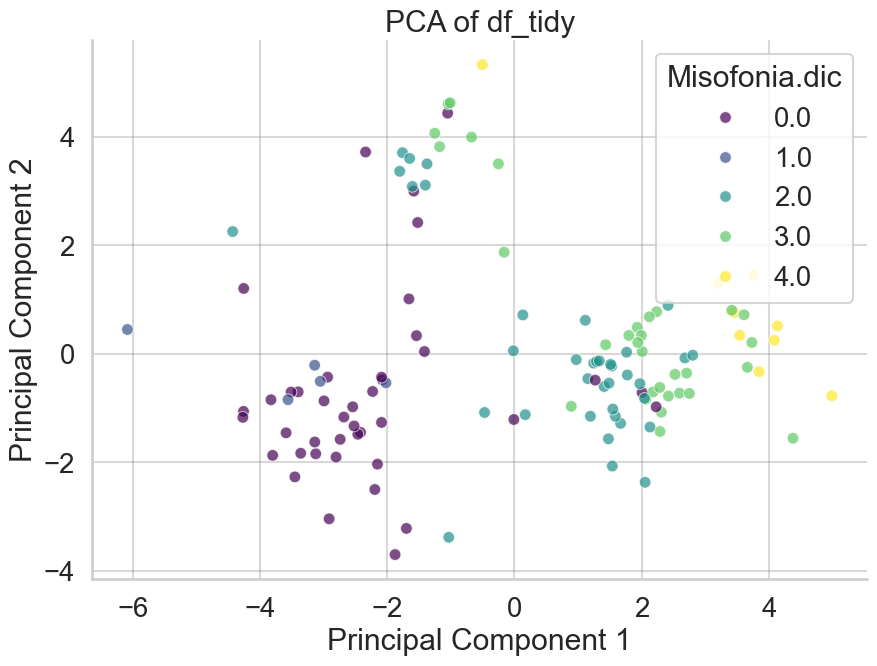

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_tidy_scaled = scaler.fit_transform(df_tidy)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
principal_components = pca.fit_transform(df_tidy_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable for visualization
df_pca['Misofonia.dic'] = df_tidy['Misofonia.dic']

# Plot the PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Misofonia.dic', data=df_pca, palette='viridis', s=70, alpha=0.7)
plt.title('PCA of df_tidy')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Random Forest Model for Predicting Depresion

In [70]:
# Separate training and test set
np.random.seed(42)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_tidy, test_size=0.2, random_state=42)
train_set_ready=train_set.drop(["depresion","depresion.dic"], axis=1)
train_set_labels=train_set["depresion"].copy()

In [72]:
from sklearn.metrics import mean_squared_error
X_test = test_set.drop(["depresion","depresion.dic"], axis=1)
y_test = test_set["depresion"].copy()


In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint, uniform
from sklearn.metrics import mean_squared_error
from scipy import stats

# Step 1: Defining the hyperparameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 500),  # Number of trees in the forest
    'max_features': [5,10,15,20],  # Number of features to consider at each split
    'max_depth': randint(10, 50),  # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],  # Use bootstrap samples when building trees
}

# Step 2: Setting up the RandomForest model and the RandomizedSearchCV
forest_reg = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(forest_reg, param_distributions,
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error', 
                                   verbose=1, random_state=42, n_jobs=-1)

# Step 3: Fitting the RandomizedSearchCV model to the data
random_search.fit(train_set_ready, train_set_labels)




Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6CB760E60>,
                                        'max_features': [5, 10, 15, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6CB767290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6C707CFE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002B6CB73F110>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

c:\Users\andre\miniconda3\envs\MMRES_UPF\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Final RMSE: 9.57246327619935


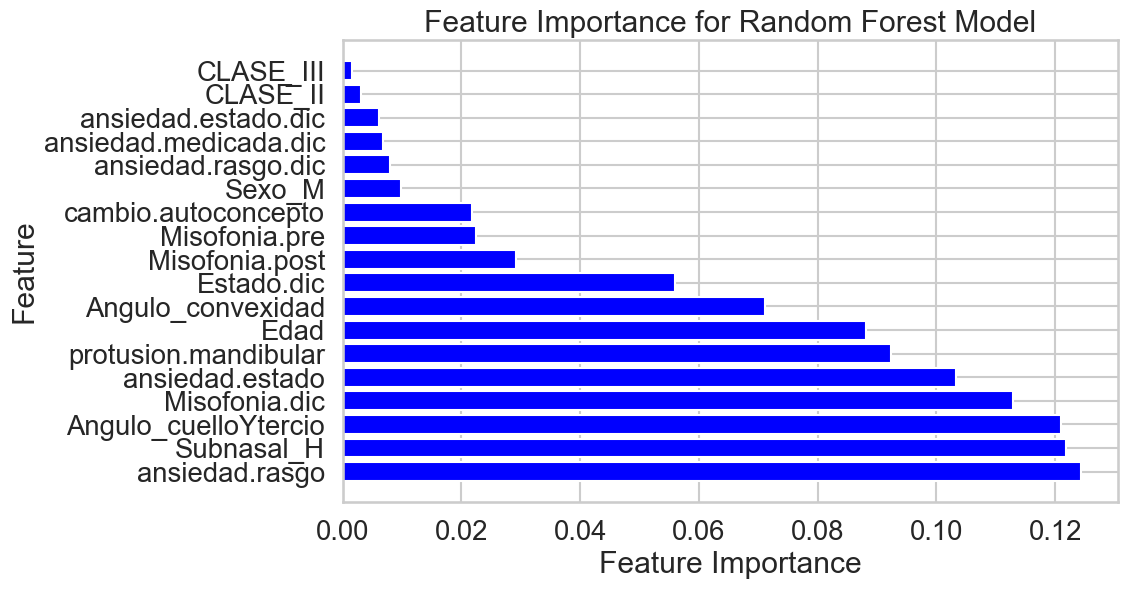

In [74]:
# Step 4: Evaluating the model performance on the test set
final_model = random_search.best_estimator_

final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print(f"Final RMSE: {final_rmse}")

# Step 5: Displaying feature importance for potential feature selection
importances = final_model.feature_importances_

# Creating a DataFrame for better visualization
features_importance_df = pd.DataFrame({
    'Feature': train_set_ready.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 6: Plot feature importance (optional for visual)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features_importance_df['Feature'], features_importance_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest Model')
plt.show()

In [75]:


confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([ 6.18200283, 12.0435438 ])

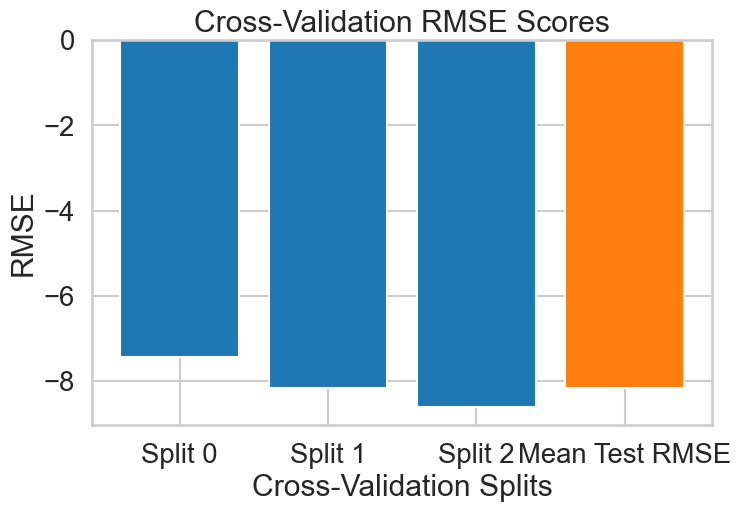

In [76]:
import matplotlib.pyplot as plt

# Cross-validation scores
splits = ['Split 0', 'Split 1', 'Split 2', 'Mean Test RMSE']
rmse_scores = [-cv_res['split0'].mean(), -cv_res['split1'].mean(), -cv_res['split2'].mean(), -cv_res['mean_test_rmse'].mean()]

plt.figure(figsize=(8, 5))
plt.bar(splits, rmse_scores, color=['#1f77b4', '#1f77b4', '#1f77b4', '#ff7f0e'])
plt.xlabel('Cross-Validation Splits')
plt.ylabel('RMSE')
plt.title('Cross-Validation RMSE Scores')
plt.show()


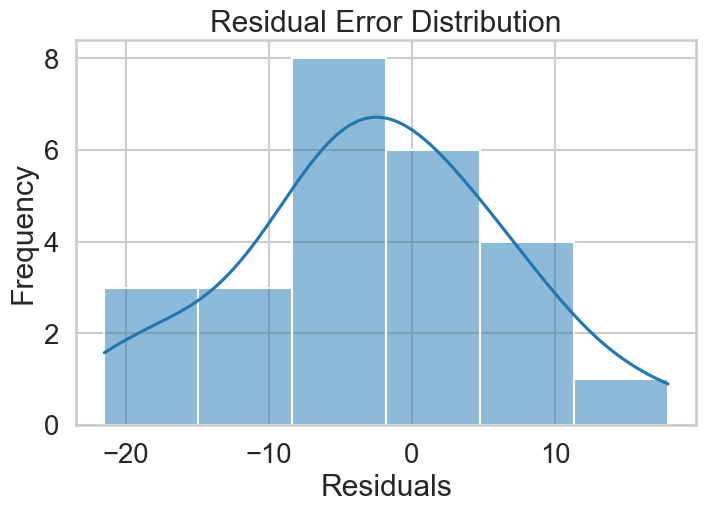

In [77]:
import seaborn as sns

# Residuals
residuals = final_predictions - y_test

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='#1f77b4')
plt.title('Residual Error Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [80]:
# compare the RMSE of the model with the range of the target variable
print(f"RMSE: {final_rmse}")
print(f"Range of the target variable: {df['depresion'].max() - df['depresion'].min()}")
print(f"RMSE as a percentage of the range: {final_rmse / (df['depresion'].max() - df['depresion'].min()) * 100:.2f}%")



RMSE: 9.57246327619935
Range of the target variable: 43.75
RMSE as a percentage of the range: 21.88%
